In [60]:
# preamble. 
import numpy as np # basic vector/matrix math
import matplotlib.pyplot as plt # plotting and illustrations 
import seaborn as sns # advanced plotting and illustrations. 
import pandas as pd # data loading, saving, and general data manipulation. 
import scipy.stats as stats # inter alia, statistical distributions, functions and relevant objects.
import scipy.optimize as optimize 
import torch # ML/AI model's and general optimization 
from sklearn.metrics import mean_squared_error
import flm_model 

# regression model imports.  
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


# STA 2453 Lab 2 Submission

This lab notebook must be completed in the appropriate time during class and invigilated by the instructor. There are  3 parts in this evaluation, you must add both this notebook, and another generated `.py` file to the PR. 

Once the PR is in place, please tag both me and the TA in it. So in the end you will have two files. 

- `STA2453-Lab-2.ipynb`
- `STA2453-Lab-2.py`

Both of these are needed for a good submission. 







---

## Case Study: Modelling Student Survey Results from the University of Catania, Italy.
---

This data is collected from a survey of 270 students attending a statistics course at the Department of Economics and Business of the University of Catania in the academic year 2011/2012.  It
     contains the following variables:

- `GENDER` gender of the respondent

- `HEIGHT` height of the respondent, measured in centimeters

- `WEIGHT` weight of the respondent measure in kilograms. 

- `HEIGHT.F` height of the respondent's father measured in centimeters. 

---


The dataset can be found here: 

`https://utstat.utoronto.ca/~pocucan/italian_students.csv`



---

## Part 1 Linear Regression 
---

This part of the evaluation considers a linear regression model with an extension into a weighted counterpart.  

We wish to assess the viability of this statement:

`Can the height of the father predict the height of the child?` 

Load the dataset into a dataframe called `df`, grab the relevant columns as stated above. 

Next create two dataframes named `df_m` and `df_f` for male/female respectively. 




In [19]:
# load the dataset and segment by reported gender. 
df = pd.read_csv("https://utstat.utoronto.ca/~pocucan/italian_students.csv").iloc[:,1:]
# just grab the relevant columns 
df_part1 = df[['HEIGHT','HEIGHT.F']]
# segment by gender. 
df_m = df[df['GENDER']=='M']
df_f = df[df['GENDER']=='F']
df_m = df_m[['HEIGHT','HEIGHT.F']]
df_f = df_f[['HEIGHT','HEIGHT.F']]

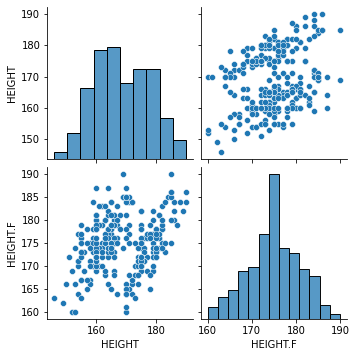

In [17]:
# plot the data in a pairplot using the seaborn package and title it appropriately. 
sns.pairplot(df)
# give some comments on the structure of the data. 

# It seems that the height of father is highly correlated with the height of child, 
# but the data of them are splitted into two groups, different groups have different
# slopes and intercepts.

Plot the same data in a pairplot using the seaborn package. Title it approprietly, AND, 
color the points by the GENDER variable. 
- Females in red 
- Males in blue

Give some comments on the structure of the data. Specifically whether the assumptions for a linear model fit are valid or not. 

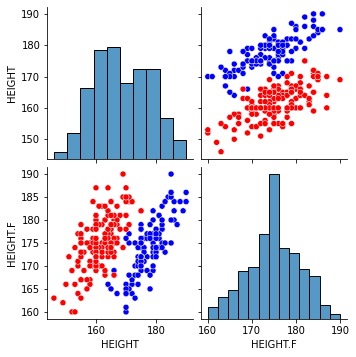

In [23]:
# plot the data with respective colours. 
colors = df['GENDER'].apply(lambda x: "red" if x == 'F' else 'blue')
sns.pairplot(df_part1,plot_kws={'c':colors})
# now give some comments on the structure of the data, 
# People are divided into two groups, the male and the female.
# The father of male have higher height than the father of female, as well as their child.
# The linear model assumption is valid since the distribution of x,y is normal,each y is independent,
# the mean value of  𝑦  is a linear function of  𝑥 ,the variance of  𝑦  is the same for any  𝑥

Fit a linear model using the following setup: 
`HEIGHT ~ HEIGHT.F`, ie. can the father's height predict the child's hight. Denote this linear model as 
`lm_general`, i.e. a linear model for the general dataset. 

Calculate the MSE of `lm_general`. 

In [28]:
# declare model. 
lm_general = LinearRegression() 
# fit model. 
X = df_part1[['HEIGHT.F']]
y = df_part1['HEIGHT']
lm_general.fit(X,y)
# MSE. 
y_pred = lm_general.predict(X)
mse = mean_squared_error(y,y_pred)
print("MSE:",mse)

MSE: 81.54862159643423


Fit two linear models using the same setup 
`HEIGHT ~ HEIGHT.F`, on the dataframes `df_m` and `df_f`, the two segmented by gender populations. 

You should have two different model objects, name them 
`lm_male` and `lm_female`. 

report the aggregate MSE for both models. Ie.
- MSE_F
- MSE_M  
- MSE_AGGREGATE = MSE_F + MSE_M 

Comment on the difference between the MSE performance of these models vs the previous, general model. 



In [29]:
# declare models for each gender. 
lm_male = LinearRegression() 
lm_female = LinearRegression() 
# fit male
X_m = df_m[['HEIGHT.F']]
y_m = df_m['HEIGHT']
lm_male.fit(X_m,y_m)
# fit female 
X_f = df_f[['HEIGHT.F']]
y_f = df_f['HEIGHT']
lm_female.fit(X_f,y_f)

LinearRegression()

In [31]:
# calculate MSE's
y_pred_m = lm_male.predict(X_m)
mse_m = mean_squared_error(y_m,y_pred_m)
y_pred_f = lm_male.predict(X_f)
mse_f = mean_squared_error(y_f,y_pred_f)
print("MSE of male:",mse_m)
print("MSE of female:",mse_f)
print("MSE_AGGREGATE:",mse_m+mse_f)

# comment on results. 
# The MSE of male model is super small while the MSE of female model is super big,
# which indicate the linear regression model performs well on the male dataset, the father's height can predict the male child's hight.
# However, the female dataset performs bad(296.94),worse than the general model MSE. also, the aggregate MSE is bigger than the general
# model as well.

MSE of male: 11.312106388928369
MSE of female: 296.9405553652711
MSE_AGGREGATE: 308.2526617541995


Render a scatter plot of `x=HEIGHT.F` and `y=HEIGHT` in grey points. 

- Plot the predicted fits of the `lm_general` model in black. (Black line)
- Plot the predictive fits of the `lm_male` model in blue. (Blue line)
- Plot the predictive fits of the `lm_female` model in red. (Red line) 

All superimposed on the same plot. So the plot should have grey points, one black line, one red line, and one blue line. Title it appropriately. 

Comment on how/why segmentation improves the model fit. Be sure to address the assumptions of a linear regression model. 

In [ ]:
# calculate y_hats. 
# have calculated above,y_pred,y_pred_m,y_pred_f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


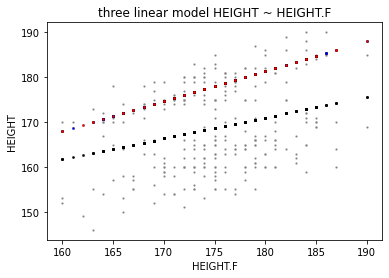

In [57]:
# Plot the fits of the lm models, you need three lines, one blue, one black, and one red.  
# points are in grey.  
def plot_motor_grey(df): 
    color = "grey" 
    sns.scatterplot(x=df['HEIGHT.F'], y = df['HEIGHT'], 
                     color = color, 
                     s = 5.0) 
def plot_motor_lr(df, y_hat,c): 

    df["y_hat"] = y_hat 
    sns.scatterplot(x = df['HEIGHT.F'], 
                y = df["y_hat"], 
                color = c, 
                s = 6,
                edgecolor = "black")

plot_motor_grey(df_part1)
plot_motor_lr(df_part1, y_pred,'black') 
plot_motor_lr(df_m, y_pred_m,'blue')
plot_motor_lr(df_f, y_pred_f,'red')
plt.title("three linear model HEIGHT ~ HEIGHT.F");
# don't forget to title it correctly! 


---
# Part 2 Logistic and Weighted Linear Regression 
---

Fit a logistic regression model predicting gender as `GENDER ~ WEIGHT`, name it `lm_logreg`. 

Render a scatter plot with the `x=HEIGHT.F`, `y=HEIGHT` with the points colored by the predicted gender of the `lm_logreg` model. 
- Females in red. 
- Males in blue. 

Using the visual, comment on the performance of the logistic regression to segment populations. Use one of subplots for the pairplot in Part 1 to justify the performance of the model. 

In [44]:
# do a logistic model predicting GENDER 
Xr = df[['WEIGHT']]
gender = df['GENDER']
lm_logreg = LogisticRegression()
lm_logreg.fit(Xr, gender)
# predict class. 
gender_hat = lm_logreg.predict(Xr)
# free function to help you with creating colors just for you. 
def map_colors(x): 
  if x == "F":
    return "red"
  else: 
    return "blue"

# create color np.array 
df['gender_hat'] = gender_hat
colors = df['gender_hat'].apply(lambda x: "red" if x == 'F' else 'blue')
colors

0      blue
1      blue
2      blue
3      blue
4       red
       ... 
265     red
266     red
267    blue
268     red
269     red
Name: gender_hat, Length: 270, dtype: object

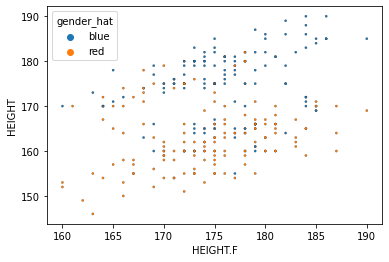

In [49]:
# plot scatter plot with logistic regression labels by color. 
sns.scatterplot(x = df['HEIGHT.F'], 
                    y = df.HEIGHT, 
                    edgecolor = 'black',
                    s=5.0, hue = colors)
# comment on the results. 
# Most of the labels are correct,but some are still incorrect, especiallly the points around the middle of the plot.

Acquire the probabilities from the logistic regression model, denote the probability matrix `Z`. The matrix should be `(270,2)` in shape, each entry denoting the probability for each observation `i` belonging to group `g`. ie. `z_ig`. 

For each column, create two weighted linear regression models denoted as `lm_female_weighted` and `lm_male_weighted`.

In [53]:
# calculate the weights of a logistic model, then use them for a weighted regression. 
Z= lm_logreg.predict_proba(Xr)
# declare the weighted models. 
lm_female_weighted = LinearRegression() 
lm_male_weighted = LinearRegression() 
# fit the models. 
weights_1 = Z[:,0]
weights_2 = Z[:,1]
lm_female_weighted.fit(X,y, sample_weight = weights_1)
lm_male_weighted.fit(X,y, sample_weight = weights_2)

LinearRegression()

Plot the data points in grey, plot the predicted fits of the general population for each linear model. 

- `lm_male_weighted` prediction in blue (blue line)
- `lm_female_weighted` prediction in red (red line)

Title it appropriately and comment on the weighted model fits compared to the `lm_general` model. 

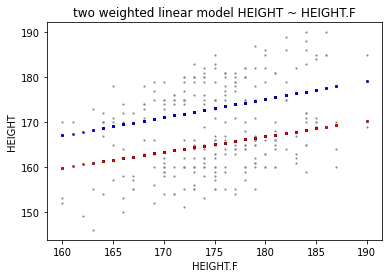

In [59]:
# Plot the fits of the lm models. 
y_pred_mw = lm_male_weighted.predict(X)
y_pred_fw = lm_female_weighted.predict(X)
plot_motor_grey(df_part1)
plot_motor_lr(df, y_pred_mw,'blue')
plot_motor_lr(df, y_pred_fw,'red')
plt.title("two weighted linear model HEIGHT ~ HEIGHT.F");
# comment on the results of the weighted linear regression. 

# This plot fits well, it can be seen that two groups of the data are divided, 
# one is for male and one is for female, and both fitted lines indicate that the
# father's height predict the child's hight, depite the child is a girl or a boy. 
# Compared to the lm_general model, apparently the weighted model fits better.

---
## Part 3: Finite Mixture Modelling 
---

Fit an appropriate finite mixture model to the dataset. Determine the optimal number of components `G` using BIC.

To achieve a 4 you must appropriately model both the conditional distribution of `HEIGHT ~ HEIGHT.F` and the covariate distribution for `HEIGHT.F` within the context of a finite mixture model. 

In [83]:
# declare X,y 
G = 2
X = df_part1['HEIGHT.F']
y = df_part1['HEIGHT']
# set up tensor such that y is in the first column.
data_s = df_part1[['HEIGHT','HEIGHT.F']].to_numpy()
data_s = torch.Tensor(data_s)
# scale the data. 
data_s = (data_s - data_s.mean())/data_s.std()  
# declare the model. 
flm = flm_model.FiniteLinearModel(G=G, data=data_s)
# train the model with appropriate lr and max_iterations. 
flm.train(lr=1e-3, max_iterations=1000)
print("BIC",flm.BIC())
# do it again with multiple settings of G to figure out which one is the best. 
# Report the BIC results for multiple G's. 
# Smaller BIC is better by the criterion.   G=1 is the best
# G= 1 BIC=-918.26
# G= 2 BIC=-907.29
# G= 3 BIC=-833.98
# G= 4 BIC=-887.45
# G= 5 BIC=-830.42

Model Training:  14%|█▍        | 138/1000 [00:00<00:01, 686.72it/s]

Loss: 745.8035278320312  λ: 0.001
Loss: 617.093505859375  λ: 0.001


Model Training:  28%|██▊       | 283/1000 [00:00<00:01, 705.82it/s]

Loss: 550.3428955078125  λ: 0.001
Loss: 509.95440673828125  λ: 0.001


Model Training:  50%|█████     | 501/1000 [00:00<00:00, 710.24it/s]

Loss: 483.5112609863281  λ: 0.001
Loss: 465.4007873535156  λ: 0.001


Model Training:  71%|███████   | 711/1000 [00:01<00:00, 676.91it/s]

Loss: 452.45831298828125  λ: 0.001
Loss: 442.7141418457031  λ: 0.001


Model Training:  93%|█████████▎| 934/1000 [00:01<00:00, 710.89it/s]

Loss: 434.9985656738281  λ: 0.001
Loss: 428.5975341796875  λ: 0.001


Model Training: 100%|██████████| 1000/1000 [00:01<00:00, 703.44it/s]

BIC -890.8920288085938


### Plot Mixture Model Results 

Acquire the labels of the model by taking the maximum of the a-posteriori. (MAP) Render a scatter plot of 
`x=HEIGHT.F`, `y=HEIGHT`, with the colors being the labels given by the MAP's. 

- Males should be colored in blue.
- Females should be colored in red. 

comment on the ability of the finite mixture model to segment the population in an unsupervised manner. 

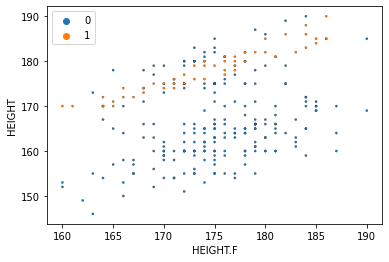

In [86]:
# get MAP labels. 
labels = flm.MAP(flm.X, flm.y)
# declare colours and plot HEIGHT.F vs HEIGHT. 
sns.scatterplot(x = df['HEIGHT.F'], 
                    y = df.HEIGHT, 
                    edgecolor = 'black',
                    s=5.0, hue = labels)
# the performance is worse than the logistic regression, most of data is identified as blue color,
# only a small group of data is red.

### Classification Table
Use the following function (`table_counts`) to create a classification table. 
Pass in the GENDER column as well as the output of the MAP labels, and comment on the ability of the Finite mixture model to correctly classify the sub-populations. 


In [87]:
def table_counts(x: np.array, y: np.array, labels=["x","y"]) -> None:
  """
    Creates a classification table to visually assess misclassification. 
  """

  table_df = pd.DataFrame({labels[0]: x, labels[1]: y})
  print(table_df.groupby(labels).size().unstack())

# get the classification table. 
table_counts(df['GENDER'],labels)

# comment on the performance of the finite mixture model. 
# most of the points are correct, while 52 points are incorrect, 
# the number of 'zeroes' is more than the number of 'ones'.
# in general, the mixture model performs well, but still need improve.

y      0     1
x             
F  151.0   NaN
M   52.0  67.0
